# CNN(Convolution neural newwork)
- 반드시 입력데이터를 (높이, 넓이,채널) 형태의 3차원 텐서로 만들어 주어야함
- 질문! 채널은 depth(강남우 CH.2.3 참조)를 이야기 하는 거겠지? -> yes!

In [1]:
import tensorflow as tf

from tensorflow import keras

import numpy as np

#### 0. 데이터 불러오기 

In [6]:
mnist = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

#### 0._1 전처리

In [9]:
# 학습 데이터 / 테스트 데이터 텐서로 변환
X_train = X_train.reshape(-1, 28, 28, 1) 
X_test = X_test.reshape(-1, 28, 28, 1) 

print(X_train.shape ,X_test.shape)
print(y_train.shape ,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [10]:
# 정규화
X_train = X_train.astype(np.float32)/ 255.0
X_test = X_test.astype(np.float32)/ 255.0

#### 01. 모델 구축
- Sequencial API 해봄 
- 추가 참조 hands-on p.453

In [18]:
cnn = tf.keras.Sequential()

cnn.add(keras.layers.Conv2D(input_shape = (28,28,1), kernel_size = (3,3),
              filters = 32, activation = 'relu'))
cnn.add(keras.layers.Conv2D(kernel_size = (3,3),
              filters = 64, activation = 'relu'))
cnn.add(keras.layers.MaxPool2D(pool_size = (2,2)))
cnn.add(keras.layers.Dropout(0.25)) # 노드 25% 떨어트림


cnn.add(keras.layers.Flatten()) # 3차원 텐서를 1차원 벡터로 변환

cnn.add(keras.layers.Dense(128, activation = 'relu')) # 은닉층 개념
cnn.add(keras.layers.Dropout(0.5)) # 오버피팅 방지
cnn.add(keras.layers.Dense(10, activation = 'softmax')) #출력층

In [19]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

#### 2. 모델 컴파일

In [22]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

#### 3. 모델 학습

In [26]:
hist = cnn.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_split= 0.3)

329/329 [==============================] - 104s 316ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0421 - val_accuracy: 0.9896


#### 4. 모델 평가

In [24]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 8s 27ms/step - loss: 0.0266 - accuracy: 0.9921


[0.0266207754611969, 0.9921000003814697]

#### 5. 정확도 및 손실

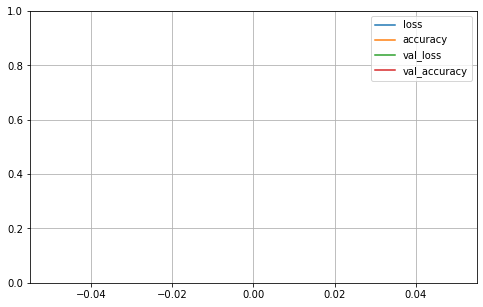

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 [0-1] 사이로 설정
plt.show()

## CIFAR-10 (컬러이미지)

In [2]:
cifar = keras.datasets.cifar10
(X_train, y_train),(X_test, y_test) = cifar.load_data()

In [39]:
X_train.shape

(50000, 32, 32, 3)

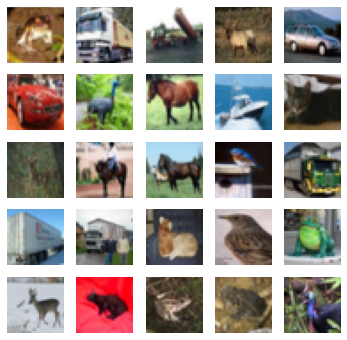

In [40]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize = (6,6))

for index in range(25):
    plt.subplot(5,5, index + 1) # 5행 5열
    plt.imshow(X_train[index], cmap = 'gray')
    plt.axis('off')
    # plt.title(str(y_train[index]))
    
plt.show()

In [41]:
# 0._1데이터 전처리

# 학습 데이터 / 테스트 데이터 텐서로 변환
X_train = X_train.reshape(-1, 32, 32, 3) 
X_test = X_test.reshape(-1, 32, 32, 3) 

print(X_train.shape ,X_test.shape)
print(y_train.shape ,y_test.shape)


# 정규화
X_train = X_train.astype(np.float32)/ 255.0
X_test = X_test.astype(np.float32)/ 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


#### 01. 모델 구축
- Functional API 해봄
- 추가 참조 hands-on p.453 / p.697

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

cnn1 = keras.layers.Conv2D(kernel_size = (3,3), 
                           filters = 32, activation = 'relu')(input_)
cnn2 = keras.layers.Conv2D(kernel_size = (3,3),
                           filters = 64, activation = 'relu')(cnn1)
pool = keras.layers.MaxPool2D(pool_size = (2,2))(cnn2)
drop_1 = keras.layers.Dropout(0.25)(pool)

flat =  keras.layers.Flatten()(drop_1) # 3차원 텐서를 1차원 벡터로 변환

hidden1 = keras.layers.Dense(128, activation = 'relu')(flat) # 은닉층 개념
drop_2 = keras.layers.Dropout(0.5)(hidden1)
output = keras.layers.Dense(10, activation = 'relu')(drop_2) # 출력측


model = keras.Model(inputs = [input_], outputs = [output])

In [46]:
# 2. 모델 컴파일
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [48]:
# 3. 모델 학습
hist = model.fit(X_train, y_train, batch_size = 128, epochs = 2, validation_split= 0.3)

Epoch 1/2
274/274 [==============================] - 129s 472ms/step - loss: 2.3261 - accuracy: 0.1023 - val_loss: 2.3026 - val_accuracy: 0.0984
Epoch 2/2
274/274 [==============================] - 116s 424ms/step - loss: 2.3187 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0984


In [49]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 2.3026 - accuracy: 0.1000


[2.30259108543396, 0.10000000149011612]

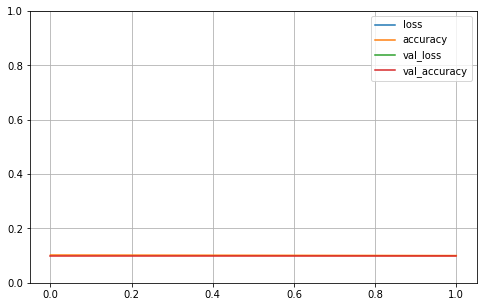

In [50]:
# 5. 정확도 및 손실
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 [0-1] 사이로 설정
plt.show()

## Image Data Augmentation
- 16강
- 추가 참조 사이트 https://www.studytonight.com/post/horizontal-and-vertical-flip-data-augmentation

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### 1. ImageDataGenerator 객체 생성

In [2]:
gen = ImageDataGenerator(rotation_range = 30,
                        width_shift_range = 0.3,
                        shear_range = 0.4,
                        horizontal_flip = True) # vertical_flip 이런 것도 있음

# rotation_range = 30     : 원본이미지 30도 이내 회전
# width_shift_range = 0.3 : 가로방향 30% 범위에서 이동
# shear_range = 0.4       : 이미지 기울기 40% 범위에서 기울임
# horizontal_flip = True  : 좌우 반전 가능한 변화 줌

#### 2. 이미지 로드 및 정규화

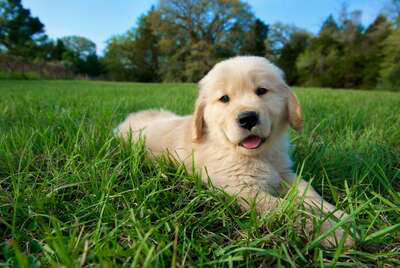

In [5]:
load_img('animal_picture/Dog/dog01.jpg')

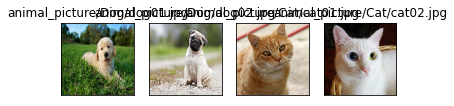

In [7]:
img_array_list = []
img_names = [ 'animal_picture/Dog/dog01.jpg', 'animal_picture/Dog/dog02.jpg',
              'animal_picture/Cat/cat01.jpg','animal_picture/Cat/cat02.jpg']

for i in range(len(img_names)):
    
    loaded_img = load_img(img_names[i], target_size=(100,100))
    
    loaded_img_array = img_to_array(loaded_img) / 255.0
    img_array_list.append(loaded_img_array)
    
plt.figure(figsize = (6,6))

for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

#### 3. flow()함수 적용

In [8]:
batch_size = 2

data_gen = gen.flow(np.array(img_array_list), batch_size = batch_size)

#### 4. next() 실행 및 변형 이미지 출력

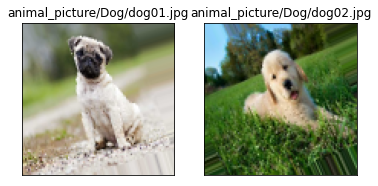

In [9]:
img = data_gen.next() # batch_size 만큼 이미지 생성

plt.figure(figsize = (6,6))

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img[i])

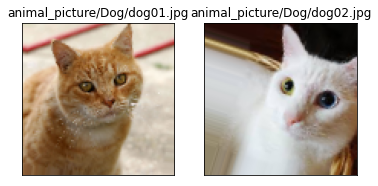

In [10]:
img = data_gen.next() # batch_size 만큼 이미지 생성

plt.figure(figsize = (6,6))

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img[i])

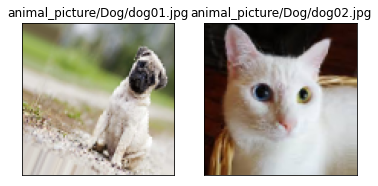

In [11]:
img = data_gen.next() # batch_size 만큼 이미지 생성

plt.figure(figsize = (6,6))

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img[i])

----
### flow_from_directory( ) 함수 예제
- 질문 : img_to_array() 이거 안해줘도 되나?

In [18]:
# 1. 객체 생성
gen = ImageDataGenerator(rotation_range = 30,
                        width_shift_range = 0.3,
                        shear_range = 0.3,
                        vertical_flip = True,
                        rescale = 1.0/255) 

# rotation_range = 30     : 원본이미지 30도 이내 회전
# width_shift_range = 0.3 : 가로방향 30% 범위에서 이동
# shear_range = 0.4       : 이미지 기울기 40% 범위에서 기울임
# vertical_flip = True    : 상하 반전 가능한 변화 줌
# rescale = 1.0/255       : 최대값으로 나누어서 0~1 값을 가지는 정규화 시행

In [19]:
data_path = './animal_picture/'
batch_size = 3

data_gen = gen.flow_from_directory(directory = data_path,
                                  batch_size = batch_size,
                                  shuffle = True,
                                  target_size = (100, 100),
                                  class_mode = 'categorical')

Found 6 images belonging to 3 classes.


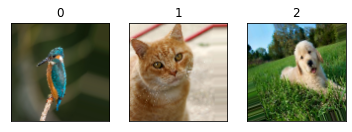

In [20]:
img,label = data_gen.next() # batch_size 만큼 이미지 생성

plt.figure(figsize = (6,6))

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(np.argmax(label[i]))
    
    plt.imshow(img[i])

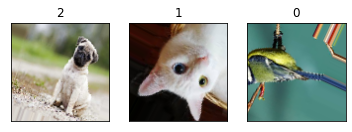

In [21]:
img,label = data_gen.next() # batch_size 만큼 이미지 생성

plt.figure(figsize = (6,6))

for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(np.argmax(label[i]))
    
    plt.imshow(img[i])

----
## CIFAR 10 Example v2
- 17강

In [22]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
cifar = keras.datasets.cifar10
(X_train, y_train),(X_test, y_test) = cifar.load_data()

In [38]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [41]:
# 0._1데이터 전처리

# 정규화
X_train = X_train.astype(np.float32)/ 255.0
X_test = X_test.astype(np.float32)/ 255.0

print(X_train.shape ,X_test.shape)
print(y_train.shape ,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


#### CIFAR 10 데이터 보강 (150% 증대)

In [25]:
gen = ImageDataGenerator(rotation_range = 20,       # 회전
                         width_shift_range = 0.2,   # 좌우 움직임
                         height_shift_range = 0.2,  # 상하 움직임
                         shear_range = 0.2,         # 기울이기
                         horizontal_flip = True )   # 좌우 반전

In [26]:
augment_ratio = 1.5
augment_size = int(augment_ratio * X_train.shape[0])

randidx = np.random.randint(X_train.shape[0], size = augment_size)

# 학습데이터 mutable type -> 변경 가능
# 새로운 데이터 만들 때
# 원본 데이터에 영향을 주지 안도록 copy

x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()

# 보강할 이미지 데이터 생성
x_augmented, y_augmented = gen.flow(x_augmented, y_augmented, 
                                   batch_size = augment_size,
                                   shuffle=False).next()

In [42]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [47]:
# x_augmented

In [48]:
# X_train

In [45]:
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

- ERROR : only integer scalar arrays can be converted to a scalar index
- 해결https://stackoverflow.com/questions/50997928/typeerror-only-integer-scalar-arrays-can-be-converted-to-a-scalar-index-with-1d


- I get this error whenever I use np.concatenate the wrong way:
- X_train = np.concatenate(X_train, x_augmented) -> X_train = np.concatenate((X_train, x_augmented))

In [49]:
# 보강된 학습데이터, 정답 데이터를 랜덤하게 섞음
s = np.arange(X_train.shape[0])
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

In [50]:
# 01. 모델 구축